In [ ]:
- Learn

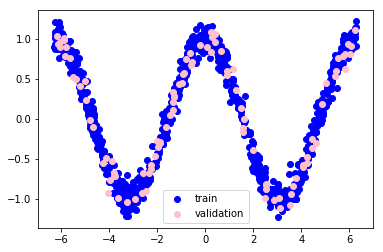

In [3]:
#Importing the necessary modules 
import tensorflow as tf 
import numpy as np 
import math, random 
import matplotlib.pyplot as plt 

np.random.seed(1000) 
function_to_learn = lambda x: np.cos(x) + 0.1*np.random.randn(*x.shape) 
layer_1_neurons = 10 
NUM_points = 1000 
#Training the parameters 
batch_size = 100 
NUM_EPOCHS = 1500

all_x = np.float32(np.random.uniform(-2*math.pi, 2*math.pi, (1, NUM_points))).T
np.random.shuffle(all_x)

train_size = int(900)
#Training the first 700 points in the given set
x_training = all_x[:train_size]
y_training = function_to_learn(x_training) 
#Training the last 300 points in the given set 
x_validation = all_x[train_size:] 
y_validation = function_to_learn(x_validation) 

plt.figure(1) 
plt.scatter(x_training, y_training, c='blue', label='train') 
plt.scatter(x_validation, y_validation, c='pink', label='validation') 
plt.legend() 
plt.show()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use `tf.global_variables_initializer` instead.
epoch 0, cost = 46.7414
epoch 100, cost = 23.0246
epoch 200, cost = 19.5691
epoch 300, cost = 15.8626
epoch 400, cost = 11.7881
epoch 500, cost = 7.52029
epoch 600, cost = 4.19154
epoch 700, cost = 2.24283
epoch 800, cost = 1.28927
epoch 900, cost = 0.878099
epoch 1000, cost = 0.69356
epoch 1100, cost = 0.612602
epoch 1200, cost = 0.576634
epoch 1300, cost = 0.558416
epoch 1400, cost = 0.548093


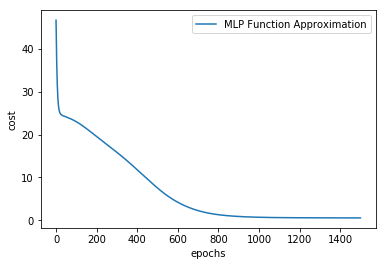

In [5]:
X = tf.placeholder(tf.float32, [None, 1], name="X") 
Y = tf.placeholder(tf.float32, [None, 1], name="Y") 

#first layer #Number of 
neurons = 10
w_h = tf.Variable(tf.random_uniform([1, layer_1_neurons], minval=-1, maxval=1, dtype=tf.float32))
b_h = tf.Variable(tf.zeros([1, layer_1_neurons], dtype=tf.float32)) 
h = tf.nn.sigmoid(tf.matmul(X, w_h) + b_h)

64
#output layer 
#Number of neurons = 10 
w_o = tf.Variable(tf.random_uniform([layer_1_neurons, 1], minval=-1, maxval=1, dtype=tf.float32))
b_o = tf.Variable(tf.zeros([1, 1], dtype=tf.float32)) 

#build the model 
model = tf.matmul(h, w_o) + b_o 

#minimize the cost function (model - Y) 
train_op = tf.train.AdamOptimizer().minimize(tf.nn.l2_loss(model - Y))

#Start the Learning phase 
sess = tf.Session() 
sess.run(tf.initialize_all_variables())

errors = []
for i in range(NUM_EPOCHS): 
    for start, end in zip(range(0, len(x_training), batch_size), range(batch_size, len(x_training), batch_size)):
        sess.run(train_op, feed_dict={X: x_training[start:end], Y: y_training[start:end]}) 
    cost = sess.run(tf.nn.l2_loss(model - y_validation), feed_dict={X:x_validation})
    errors.append(cost) 
    if i%100 == 0: 
        print("epoch %d, cost = %g" % (i, cost))
        
plt.plot(errors,label='MLP Function Approximation')
plt.xlabel('epochs') 
plt.ylabel('cost') 
plt.legend() 
plt.show()